# Hoja de Trabajo 5
## Redes Bayesianas
---
**Integrantes**
- Maria Marta Ramirez Gil
- Gustavo Andres Gonzalez Pineda 
- Diego Alberto Leiva Pérez 
- José Pablo Orellana Orellana 
- Gabriel Estuardo García Donis 
---

### Analisis Exploratorio

**Importar Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Cargar el dataset al entorno**

In [2]:
df = pd.read_csv("student.csv", sep = ",")

**Resumen de los datos**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         144 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

**Visualizar la data**

In [4]:
df.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


**Estructura del dataset**

In [5]:
print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  145  filas y  16  columnas


**Tipos de variables**

In [6]:
categoricas = []

for columna in df.columns:
    if df[columna].dtype=='O':
        categoricas.append(columna)
        
print("Hay ", len(categoricas), " variables categoricas")


print("Las variables categoricas son: ")
print("-"*30)
for var in categoricas:
    print(var)


Hay  12  variables categoricas
Las variables categoricas son: 
------------------------------
Sex
High_School_Type
Scholarship
Additional_Work
Sports_activity
Transportation
Attendance
Reading
Notes
Listening_in_Class
Project_work
Grade


In [7]:
numericas = []

for columna in df.columns:
    if df[columna].dtype=='int64' or df[columna].dtype=='float64':
        numericas.append(columna)
        
print("Hay ", len(numericas), " variables numericas")


print("Las variables numericas son: ")
print("-"*30)
for var in numericas:
    print(var)


Hay  4  variables numericas
Las variables numericas son: 
------------------------------
Unnamed: 0
Id
Student_Age
Weekly_Study_Hours


**Variables Identificadas**

1. **Unnamed: 0**: Parece ser una columna de índices automáticos generados. NO RELEVANTE

2. **Id**: Identificador único para cada entrada en el DataFrame, probablemente representando a cada estudiante.

3. **Student_Age**: Edad del estudiante, de tipo entero (`int64`).

4. **Sex**: Sexo del estudiante, de tipo objeto (`object`), lo que usualmente indica que los datos son cadenas de texto.

5. **High_School_Type**: Tipo de escuela secundaria, almacenado como texto (`object`).

6. **Scholarship**: Indica si el estudiante tiene una beca. Nota que hay 144 valores no nulos, por lo que una entrada está faltando en esta columna.

7. **Additional_Work**: Información sobre si el estudiante realiza trabajos adicionales, almacenado como texto (`object`).

8. **Sports_activity**: Actividad deportiva del estudiante, también de tipo objeto (`object`).

9. **Transportation**: Método de transporte del estudiante, de tipo objeto (`object`).

10. **Weekly_Study_Hours**: Número de horas de estudio por semana, de tipo entero (`int64`).

11. **Attendance**: Asistencia del estudiante, almacenado como texto (`object`).

12. **Reading**: Hábitos de lectura del estudiante, también almacenados como texto (`object`).

13. **Notes**: Si el estudiante toma notas, de tipo objeto (`object`).

14. **Listening_in_Class**: Si el estudiante escucha en clase, almacenado como texto (`object`).

15. **Project_work**: Trabajo de proyecto del estudiante, también de tipo objeto (`object`).

16. **Grade**: Calificaciones del estudiante, almacenado como texto (`object`).

### Preprocesamiento y limpieza

**Validar que no haya nulos**

In [8]:
df.isnull().sum()

Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

Solo existe un unico valor nulo, en la columna de becas academicas, por lo tanto se entiende que dicho registro es de un estudiante sin beca, se procede a llenar con 0%

In [9]:
df['Scholarship'] = df['Scholarship'].fillna('0%')

**Frecuencia de valores categoricos**

In [10]:
for var in categoricas:
    print(df[var].value_counts())
    print("-"* 30)

Sex
Male      87
Female    58
Name: count, dtype: int64
------------------------------
High_School_Type
State      103
Private     25
Other       17
Name: count, dtype: int64
------------------------------
Scholarship
50%     76
75%     42
100%    23
25%      3
0%       1
Name: count, dtype: int64
------------------------------
Additional_Work
No     96
Yes    49
Name: count, dtype: int64
------------------------------
Sports_activity
No     87
Yes    58
Name: count, dtype: int64
------------------------------
Transportation
Private    84
Bus        61
Name: count, dtype: int64
------------------------------
Attendance
Always       98
Sometimes    25
Never        21
3             1
Name: count, dtype: int64
------------------------------
Reading
No     76
Yes    69
Name: count, dtype: int64
------------------------------
Notes
Yes    77
No     66
6       2
Name: count, dtype: int64
------------------------------
Listening_in_Class
Yes    75
No     69
6       1
Name: count, dtype: int64

Frecuencia de valores como porcentajes

In [11]:
for var in categoricas:
    print(df[var].value_counts()/float(len(df)))
    print('-'*30)

Sex
Male      0.6
Female    0.4
Name: count, dtype: float64
------------------------------
High_School_Type
State      0.710345
Private    0.172414
Other      0.117241
Name: count, dtype: float64
------------------------------
Scholarship
50%     0.524138
75%     0.289655
100%    0.158621
25%     0.020690
0%      0.006897
Name: count, dtype: float64
------------------------------
Additional_Work
No     0.662069
Yes    0.337931
Name: count, dtype: float64
------------------------------
Sports_activity
No     0.6
Yes    0.4
Name: count, dtype: float64
------------------------------
Transportation
Private    0.57931
Bus        0.42069
Name: count, dtype: float64
------------------------------
Attendance
Always       0.675862
Sometimes    0.172414
Never        0.144828
3            0.006897
Name: count, dtype: float64
------------------------------
Reading
No     0.524138
Yes    0.475862
Name: count, dtype: float64
------------------------------
Notes
Yes    0.531034
No     0.455172
6     

**Cardinalidad**

In [12]:
for var in categoricas:
    print(var, ' tiene ', len(df[var].unique()), ' etiquetas')

Sex  tiene  2  etiquetas
High_School_Type  tiene  3  etiquetas
Scholarship  tiene  5  etiquetas
Additional_Work  tiene  2  etiquetas
Sports_activity  tiene  2  etiquetas
Transportation  tiene  2  etiquetas
Attendance  tiene  4  etiquetas
Reading  tiene  2  etiquetas
Notes  tiene  3  etiquetas
Listening_in_Class  tiene  3  etiquetas
Project_work  tiene  2  etiquetas
Grade  tiene  8  etiquetas


**Eliminar columnas irrelevantes**

In [13]:
df = df.drop(columns=['Unnamed: 0'])

Se elimina la columna Unnamed al ser una columna sin relevancia dentro del dataset

In [14]:
df.head()

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


## Naive Bayes

**Variable objetivo, set de entrenamiento y prueba**

In [15]:
# Seleccionar la variable objetivo
# El interes sera encontrar que factores influyen en que un estudiante obtenga una beca
# Por lo tanto, la variable objetivo sera 'Scolarship'
X = df.drop(['Scholarship'], axis = 1)
y = df['Scholarship']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Ver como esta la estructura del split**

In [17]:
X_train.shape, X_test.shape

((101, 14), (44, 14))

In [18]:
categoricas.remove("Scholarship")

In [19]:
categoricas

['Sex',
 'High_School_Type',
 'Additional_Work',
 'Sports_activity',
 'Transportation',
 'Attendance',
 'Reading',
 'Notes',
 'Listening_in_Class',
 'Project_work',
 'Grade']

**Codificar categoricas**

In [20]:
encoder = ce.OneHotEncoder(cols=categoricas)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [21]:
X_train.head()

,Id,Student_Age,Sex_1,Sex_2,High_School_Type_1,High_School_Type_2,High_School_Type_3,Additional_Work_1,Additional_Work_2,Sports_activity_1,...,Project_work_1,Project_work_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8
113,5114,21,1,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
96,5097,18,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
93,5094,18,0,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
51,5052,19,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
30,5031,19,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [22]:
X_train.shape, X_test.shape

((101, 36), (44, 36))

**Escalado de los datos**

In [23]:
cols = X_train.columns

In [24]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
#La diferencia es que fit_transform ajusta los parametros en base al set de entrenamiento
#Mientras en trasnform utiliza esos mismos parametros para escalar

In [25]:
# X_train es un arreglo de numpy, lo queremos volver un dataframe de pandas.
# Lo mismo para X_test

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [26]:
X_train.head()

,Id,Student_Age,Sex_1,Sex_2,High_School_Type_1,High_School_Type_2,High_School_Type_3,Additional_Work_1,Additional_Work_2,Sports_activity_1,...,Project_work_1,Project_work_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8
0,0.549296,0.666667,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.309859,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.267606,-0.333333,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,...,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.323944,0.000000,1.0,-1.0,1.0,-1.0,0.0,-1.0,1.0,-1.0,...,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.619718,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,...,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Entrenamiento del modelo**

In [27]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

**Predicciones de resultados**

In [28]:
y_pred = gnb.predict(X_test)
y_pred

array(['100%', '100%', '100%', '100%', '100%', '75%', '100%', '100%',
       '100%', '25%', '100%', '100%', '100%', '100%', '75%', '100%',
       '100%', '100%', '100%', '100%', '100%', '75%', '100%', '50%',
       '100%', '100%', '100%', '100%', '100%', '100%', '100%', '100%',
       '100%', '100%', '100%', '100%', '100%', '75%', '75%', '100%',
       '25%', '100%', '100%', '100%'], dtype='<U4')

**Evaluacion de rendimiento**

In [29]:
acc = accuracy_score(y_test, y_pred)

print("La precision del modelo es de: ", acc)


La precision del modelo es de:  0.20454545454545456


**Precisión en los Datos de Prueba (0.2045 o 20.45%)**: La precisión ha disminuido significativamente en el conjunto de datos de prueba. Esta es una señal de que el modelo no está generalizando bien y que su capacidad para hacer predicciones correctas en nuevos datos es bastante baja. Una caída en la precisión desde el conjunto de entrenamiento hasta el conjunto de prueba también puede indicar sobreajuste, aunque en este caso, la precisión en el conjunto de entrenamiento tampoco es muy alta.

**Evaluacion de overfitting**

In [30]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['100%', '75%', '0%', '100%', '100%', '100%', '50%', '25%', '100%',
       '100%', '100%', '100%', '100%', '75%', '75%', '100%', '100%',
       '75%', '100%', '100%', '100%', '100%', '100%', '100%', '100%',
       '100%', '100%', '100%', '100%', '75%', '75%', '100%', '100%',
       '100%', '75%', '100%', '75%', '25%', '100%', '100%', '100%',
       '100%', '100%', '100%', '100%', '100%', '100%', '100%', '100%',
       '75%', '100%', '100%', '100%', '100%', '100%', '25%', '25%', '25%',
       '75%', '100%', '100%', '25%', '75%', '100%', '100%', '100%',
       '100%', '50%', '100%', '100%', '100%', '100%', '75%', '75%',
       '100%', '100%', '100%', '100%', '100%', '100%', '100%', '100%',
       '100%', '100%', '25%', '100%', '100%', '100%', '100%', '100%',
       '100%', '100%', '75%', '100%', '100%', '100%', '75%', '75%',
       '100%', '100%', '100%'], dtype='<U4')

In [31]:
acc = accuracy_score(y_train , y_pred_train)

print("La precision del modelo es de: ", acc)

La precision del modelo es de:  0.3564356435643564


**Precisión en los Datos de Entrenamiento (0.3564 o 35.64%)**: Esta es una medida de qué tan bien el modelo se ajusta al conjunto de datos de entrenamiento. Una precisión de aproximadamente 35.64% indica que el modelo está lejos de ser perfecto, pero tiene cierta capacidad para hacer predicciones correctas. Sin embargo, esta métrica no es excepcionalmente alta, lo que puede ser bueno en el sentido de que no parece haber un sobreajuste extremo.

**Matriz de confusion del Modelo**

In [32]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('Verdadetos Positivos / True Positives(TP) = ', cm[0,0])

print('Verdaderos Negativos /True Negatives(TN) = ', cm[1,1])

print('Falsos Positivos / False Positives(FP) = ', cm[0,1])

print('Falsos Negativos / False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5  0  0  0]
 [ 0  0  0  0]
 [25  2  1  2]
 [ 6  0  0  3]]
Verdadetos Positivos / True Positives(TP) =  5
Verdaderos Negativos /True Negatives(TN) =  0
Falsos Positivos / False Positives(FP) =  0
Falsos Negativos / False Negatives(FN) =  0


Visualizar la matriz

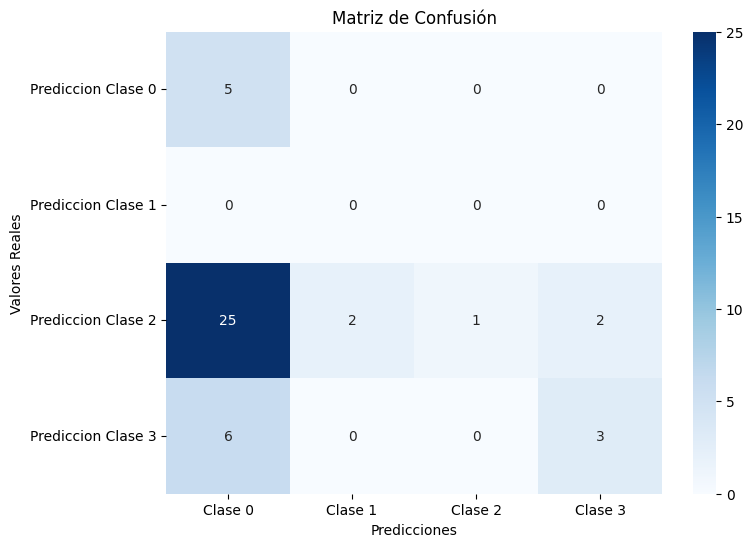

In [33]:
# Supongamos que cm es tu matriz de confusión existente
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3'], 
                         index=['Prediccion Clase 0', 'Prediccion Clase 1', 
                                'Prediccion Clase 2', 'Prediccion Clase 3'])

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

1. **Clase 0 (100%)**: Se predijo correctamente en todos los casos (5/5). No hay falsos positivos o negativos para esta clase en la muestra dada.

2. **Clase 1 (25%)**: No hay datos de muestra para esta clase, lo cual es consistente con la falta de soporte indicado en tus métricas de rendimiento. Esto puede indicar que no había ejemplos de esta clase en tu conjunto de prueba, o que el modelo no realizó ninguna predicción para esta clase.

3. **Clase 2 (50%)**: Hubo una gran cantidad de verdaderos negativos (25 casos fueron clasificados correctamente como no pertenecientes a la Clase 2). Sin embargo, el modelo tuvo problemas para clasificar esta clase correctamente, con solo 1 verdadero positivo y 4 falsos positivos (2 para la Clase 3 y 1 para la Clase 0).

4. **Clase 3 (75%)**: Hubo 3 verdaderos positivos, pero también 6 falsos negativos, indicando que el modelo a menudo confundió los elementos de esta clase con la Clase 0.

### Conclusiones de la Matriz de Confusión

- **Sensibilidad para Clase 0**: Tu modelo tiene una alta sensibilidad para detectar la Clase 0, lo que es positivo si esa es una clase crítica.
- **Clase 1 Ausente**: La ausencia de datos de la Clase 1 sugiere que necesitas revisar tu conjunto de datos de entrenamiento y prueba para asegurar una representación adecuada de todas las clases o ajustar el modelo para manejar clases con muy pocas muestras.
- **Confusión entre Clases 0 y 3**: Hay una notable confusión entre las Clases 0 y 3. Esto podría indicar que las características que diferencian estas dos clases no están bien definidas o no están siendo capturadas efectivamente por el modelo.
- **Pobre Desempeño en Clase 2**: La Clase 2 es la que tiene el desempeño más pobre en términos de recall, lo cual es evidente por el hecho de que solo un caso fue clasificado correctamente como perteneciente a esta clase, mientras que muchos casos fueron clasificados incorrectamente como otras clases. Esto es particularmente problemático dado que es la clase con más muestras.

**Metricas de desempeño**

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        100%       0.14      1.00      0.24         5
         25%       0.00      0.00      0.00         0
         50%       1.00      0.03      0.06        30
         75%       0.60      0.33      0.43         9

    accuracy                           0.20        44
   macro avg       0.43      0.34      0.18        44
weighted avg       0.82      0.20      0.16        44



c:\Users\diego\Documents\UVG\7mo Semestre\Mineria de Datos\hdt5_MineriaDeDatos\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\Documents\UVG\7mo Semestre\Mineria de Datos\hdt5_MineriaDeDatos\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\Documents\UVG\7mo Semestre\Mineria de Datos\hdt5_MineriaDeDatos\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divisi

### Desglose de Métricas

1. **Precision**
   - **100%**: La precisión es del 14%, lo que indica que de todas las predicciones que el modelo hizo para esta clase, solo el 14% eran correctas. Sin embargo, el recall de 100% significa que el modelo identificó correctamente todas las instancias reales de esta clase en el conjunto de datos.
   - **25%**: Tiene una precisión de 0% porque aparentemente no hubo predicciones para esta clase (support es 0), indicando que el modelo no intentó predecir esta categoría.
   - **50%**: Tiene una precisión del 100%, indicando una precisión perfecta, pero el recall es extremadamente bajo (3%), lo que significa que casi todas las instancias reales de esta clase fueron ignoradas por el modelo.
   - **75%**: La precisión es del 60% y el recall del 33%, lo que sugiere un equilibrio algo mejor entre precisión y recall en comparación con otras clases.

2. **Recall**
   - El recall alto (100%) para la clase "100%" indica que el modelo es extremadamente sensible a esta clase, pero podría estar sobre ajustándose solo a estas etiquetas en detrimento de otras.
   - El recall extremadamente bajo para "50%" muestra que el modelo está fallando en identificar la mayoría de los casos verdaderos de esta clase.

3. **F1-Score**
   - El F1-Score combina la precisión y el recall en una sola métrica que toma en cuenta ambos aspectos del rendimiento. Los valores de F1-Score son muy bajos para todas las clases excepto para "100%", indicando que el modelo no está equilibrado adecuadamente entre precisión y recall.
   - El F1-Score es especialmente bajo para "50%", lo que refleja tanto la alta precisión como el bajo recall.

4. **Support**
   - El número de muestras para cada clase muestra un desbalance significativo, particularmente con 0 muestras para "25%". Esto podría estar afectando la capacidad del modelo para aprender adecuadamente sobre esta categoría.